In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

There is a total of 349,655,790 rows with about 22GB of data.

In [2]:
file_name = '../data/transactions.csv'
chunksize = 10 ** 7
chunk_iter = pd.read_csv(file_name, chunksize=chunksize)

In [3]:
chunk1 = chunk_iter.next()
chunk1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 11 columns):
id                  int64
chain               int64
dept                int64
category            int64
company             int64
brand               int64
date                object
productsize         float64
productmeasure      object
purchasequantity    int64
purchaseamount      float64
dtypes: float64(2), int64(7), object(2)
memory usage: 839.2+ MB


In [4]:
chunk1.head()

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
0,86246,205,7,707,1078778070,12564,2012-03-02,12.0,OZ,1,7.59
1,86246,205,63,6319,107654575,17876,2012-03-02,64.0,OZ,1,1.59
2,86246,205,97,9753,1022027929,0,2012-03-02,1.0,CT,1,5.99
3,86246,205,25,2509,107996777,31373,2012-03-02,16.0,OZ,1,1.99
4,86246,205,55,5555,107684070,32094,2012-03-02,16.0,OZ,2,10.38


In [5]:
chunk1.tail()

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
9999995,126082871,18,36,3634,1078616272,7237,2012-08-31,32.0,OZ,2,3.00
9999996,126082871,18,6,610,107084777,11910,2012-08-31,16.0,OZ,1,2.29
9999997,126082871,18,56,5607,102113020,10786,2012-08-31,16.0,OZ,1,3.49
9999998,126082871,18,63,6321,107989373,29344,2012-08-31,10.0,OZ,1,3.99
9999999,126082871,18,33,3305,102840020,18584,2012-08-31,10.0,OZ,1,3.00


In [6]:
chunk1.describe()

,id,chain,dept,category,company,brand,productsize,purchasequantity,purchaseamount
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,1.111775e+08,2.631343e+01,4.166467e+01,4.180254e+03,2.202853e+08,1.593180e+04,2.834404e+01,1.380535e+00,4.572598e+00
std,1.974703e+07,3.059072e+01,2.789194e+01,2.791806e+03,4.418062e+08,1.509730e+04,5.072834e+01,1.167092e+00,6.496406e+00
min,8.624600e+04,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04,0.000000e+00,0.000000e+00,-2.800000e+01,-2.664200e+02
25%,1.046491e+08,1.400000e+01,1.800000e+01,1.890000e+03,1.021130e+08,7.848000e+03,7.500000e+00,1.000000e+00,2.290000e+00
50%,1.209127e+08,1.500000e+01,3.600000e+01,3.630000e+03,1.040000e+08,1.329100e+04,1.420000e+01,1.000000e+00,3.490000e+00
75%,1.238009e+08,1.800000e+01,6.000000e+01,6.012000e+03,1.073041e+08,1.711700e+04,2.400000e+01,1.000000e+00,5.490000e+00
max,1.260829e+08,2.170000e+02,9.900000e+01,9.999000e+03,1.099874e+10,1.086200e+05,4.000000e+03,3.840000e+02,3.000000e+03


9,606 unique customers in this chunk.

In [7]:
chunk1['id'].unique().shape

(9606,)

## Top department

In [8]:
dept_count = chunk1.groupby('dept')['dept'].count().sort_values(ascending=False)
(dept_count / dept_count.sum()).head(15)

dept
9     0.086751
63    0.077805
99    0.054898
36    0.050704
33    0.042609
56    0.040353
58    0.037662
5     0.035145
26    0.034572
8     0.028861
51    0.028739
64    0.025441
4     0.022438
97    0.022086
21    0.021762
Name: dept, dtype: float64

## Top category

In [9]:
category_count = chunk1.groupby('category')['category'].count().sort_values(ascending=False)
(category_count / category_count.sum()).head(15)

category
907     0.033090
6315    0.028687
501     0.020184
9909    0.019505
9908    0.017165
9753    0.016590
9904    0.016198
902     0.015051
6320    0.013909
5823    0.010413
6401    0.010006
901     0.009711
3303    0.009009
9609    0.008816
3611    0.007887
Name: category, dtype: float64

## Top chains

In [10]:
chain_count = chunk1.groupby('chain')['chain'].count().sort_values(ascending=False)
(chain_count / chain_count.sum()).head(15)

chain
15     0.239584
18     0.175876
4      0.155897
17     0.096828
95     0.087274
20     0.069154
14     0.068661
88     0.065687
3      0.036765
205    0.002470
192    0.000859
58     0.000314
46     0.000299
217    0.000253
2      0.000080
Name: chain, dtype: float64

## Top companies

In [11]:
company_count = chunk1.groupby('company')['company'].count().sort_values(ascending=False)
(company_count / company_count.sum()).head(15)

company
102113020    0.207167
107989373    0.033782
102840020    0.021571
101600010    0.015470
104400040    0.014116
103700030    0.014077
103800030    0.011840
104900040    0.011792
102100020    0.011725
10000        0.011114
105100050    0.010110
101200010    0.009802
107127979    0.009223
103400030    0.008598
104470040    0.008583
Name: company, dtype: float64

## Top brands

In [12]:
brand_count = chunk1.groupby('brand')['brand'].count().sort_values(ascending=False)
(brand_count / brand_count.sum()).head(15)

brand
15704    0.124630
10786    0.062087
0        0.018323
12908    0.015449
30626    0.013390
33170    0.012552
6732     0.009223
16397    0.009043
88199    0.008816
9886     0.007436
13310    0.006579
29344    0.006077
2820     0.005696
20230    0.005490
5278     0.005481
Name: brand, dtype: float64

## Time series plot
Number of transactions on each date.

In [13]:
date_trans_count = chunk1.groupby('date')['date'].count()

In [14]:
print min(date_trans_count.index)
print max(date_trans_count.index)

2012-03-02
2013-07-27


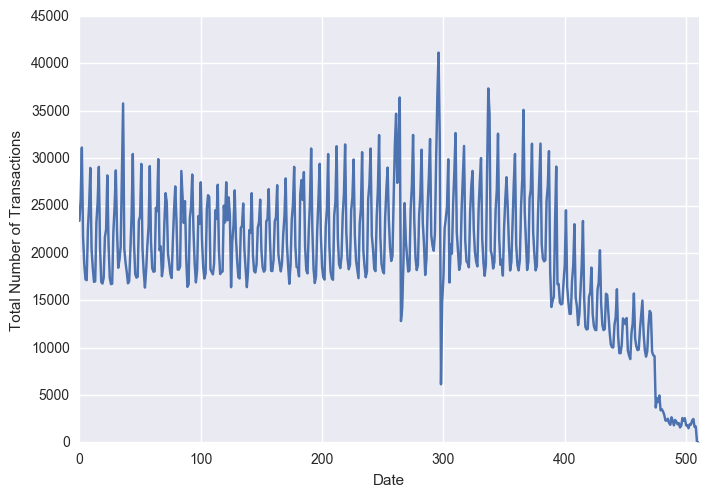

In [15]:
ax = sns.tsplot(date_trans_count)
ax.set(xlabel='Date', ylabel='Total Number of Transactions')
plt.show()

## Number of transactions per user

In [16]:
id_counts = chunk1.groupby('id')['id'].count()
id_counts.value_counts().sort_values(ascending=False).head(15)

768     14
474     14
554     14
762     14
565     14
1160    13
464     13
488     13
248     13
310     13
525     13
1126    12
510     12
529     12
276     12
Name: id, dtype: int64

In [17]:
id_counts.describe()

count     9606.000000
mean      1041.016032
std        709.232351
min          7.000000
25%        522.250000
50%        895.000000
75%       1411.000000
max      12609.000000
Name: id, dtype: float64

Heavily skewed to the right. Will have to remove or cap this feature.

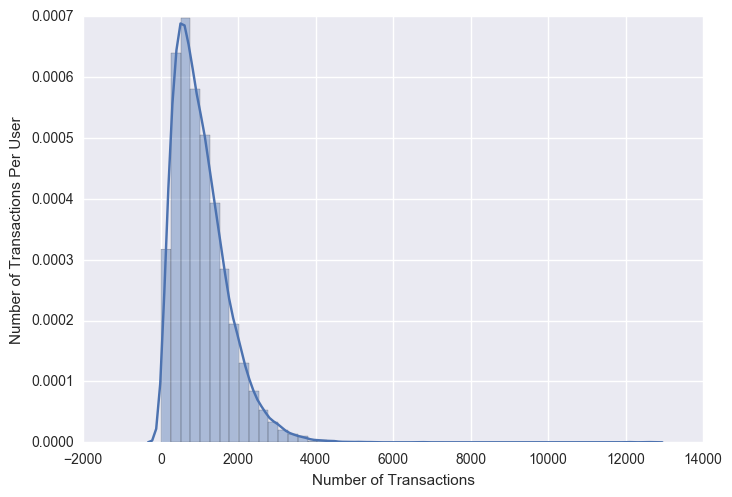

In [18]:
ax = sns.distplot(id_counts)
ax.set(xlabel = 'Number of Transactions', ylabel='Number of Transactions Per User')
plt.show()

## Train history data

In [19]:
train = pd.read_csv('../data/trainHistory.csv')
offers = pd.read_csv('../data/offers.csv')

In [20]:
# Add department to offers
dept = []
for i in range(offers.shape[0]):
    str_category = str(offers['category'].iloc[i])
    if len(str_category) == 4:
        dept.append(str_category[:2])
    else:
        dept.append(str_category[:1])
offers['dept'] = dept
offers['dept'] = pd.to_numeric(offers['dept'])

In [21]:
train = pd.merge(train, offers, how='left', on=['offer'])

In [22]:
# Rename columns
train.columns = ['id', 'chain', 'offer', 'market', 'repeattrips', 'repeater', 'offerdate', 
                 'offer_category', 'quantity', 'offer_company', 'offervalue', 'offer_brand',
                 'offer_dept']

In [23]:
# Convert to date
train['offerdate'] = pd.to_datetime(train['offerdate'], format='%Y/%m/%d')

In [24]:
# Merge the number of transactions per customer to the train data
id_counts_df = pd.DataFrame(id_counts)
id_counts_df.columns = ['counts']
id_counts_df.reset_index(inplace=True)
train = pd.merge(train, id_counts_df, how='left', on='id')

In [25]:
# Reencode the target variable
train['repeater'] = np.where(train['repeater'] == 't', '1', '0')
train['repeater'] = pd.to_numeric(train['repeater'])

In [26]:
train.head()

,id,chain,offer,market,repeattrips,repeater,offerdate,offer_category,quantity,offer_company,offervalue,offer_brand,offer_dept,counts
0,86246,205,1208251,34,5,1,2013-04-24,2202,1,104460040,2.00,3718,22,12609.0
1,86252,205,1197502,34,16,1,2013-03-27,3203,1,106414464,0.75,13474,32,12087.0
2,12682470,18,1197502,11,0,0,2013-03-28,3203,1,106414464,0.75,13474,32,806.0
3,12996040,15,1197502,9,0,0,2013-03-25,3203,1,106414464,0.75,13474,32,326.0
4,13089312,15,1204821,9,0,0,2013-04-01,5619,1,107717272,1.50,102504,56,1218.0


About 27% of customers in the training data have used the offer.

In [27]:
train['repeater'].mean()

0.27139081702143614

37 total offers in the offers CSV file. There are 24 unique offers in the training set and 13 unique offers in the testing set.

In [28]:
print len(offers['offer'].unique())
print len(train['offer'].unique())

37
24


Customers with more transactions are more likely to accept the offer.

In [29]:
train.groupby('repeater')['counts'].mean()

repeater
0     908.848820
1    1100.929708
Name: counts, dtype: float64

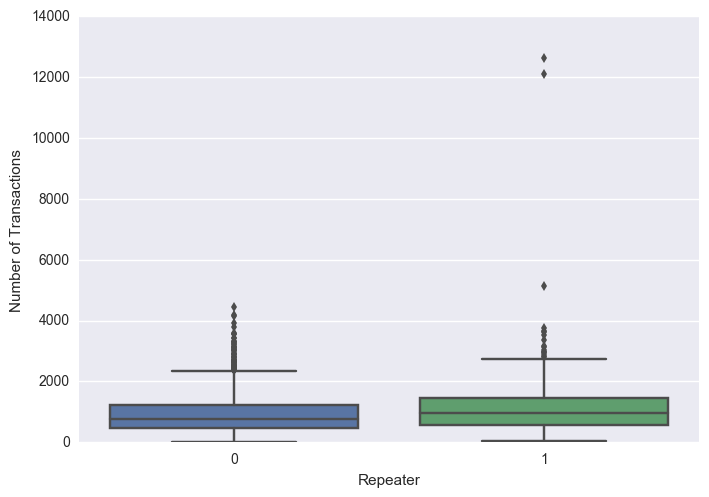

In [30]:
ax = sns.boxplot(x='repeater', y='counts', data=train)
ax.set(xlabel='Repeater', ylabel='Number of Transactions')
plt.show()

Offers by category

In [31]:
category_counts = train.groupby('offer_category')['offer_category'].count()
(category_counts / category_counts.sum()).sort_values(ascending=False)

offer_category
3203    0.285223
9909    0.138369
2119    0.117252
2202    0.115090
4401    0.093767
6202    0.056580
5616    0.045565
5558    0.043572
1726    0.039505
5619    0.028840
1703    0.025991
3509    0.008859
3504    0.001387
Name: offer_category, dtype: float64

Offers by department

In [32]:
dept_counts = train.groupby('offer_dept')['offer_dept'].count()
(dept_counts / dept_counts.sum()).sort_values(ascending=False)

offer_dept
32    0.285223
99    0.138369
21    0.117252
22    0.115090
44    0.093767
56    0.074405
17    0.065495
62    0.056580
55    0.043572
35    0.010246
Name: offer_dept, dtype: float64

Offers by brand

In [33]:
brand_counts = train.groupby('offer_brand')['offer_brand'].count()
(brand_counts / brand_counts.sum()).sort_values(ascending=False)

offer_brand
13474     0.285223
6926      0.117252
3718      0.115090
28840     0.095822
13791     0.093767
7668      0.066882
64486     0.056580
15889     0.045565
5072      0.043572
6732      0.042547
102504    0.028840
875       0.008859
Name: offer_brand, dtype: float64

## Let's see how many transactions a customer has in the same offer category/brand/dept/company

In [34]:
train_trans = pd.merge(train, chunk1, how='left', on=['id', 'chain'])

In [35]:
train_trans.head()

,id,chain,offer,market,repeattrips,repeater,offerdate,offer_category,quantity,offer_company,...,counts,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
0,86246,205,1208251,34,5,1,2013-04-24,2202,1,104460040,...,12609.0,7.0,707.0,1.078778e+09,12564.0,2012-03-02,12.0,OZ,1.0,7.59
1,86246,205,1208251,34,5,1,2013-04-24,2202,1,104460040,...,12609.0,63.0,6319.0,1.076546e+08,17876.0,2012-03-02,64.0,OZ,1.0,1.59
2,86246,205,1208251,34,5,1,2013-04-24,2202,1,104460040,...,12609.0,97.0,9753.0,1.022028e+09,0.0,2012-03-02,1.0,CT,1.0,5.99
3,86246,205,1208251,34,5,1,2013-04-24,2202,1,104460040,...,12609.0,25.0,2509.0,1.079968e+08,31373.0,2012-03-02,16.0,OZ,1.0,1.99
4,86246,205,1208251,34,5,1,2013-04-24,2202,1,104460040,...,12609.0,55.0,5555.0,1.076841e+08,32094.0,2012-03-02,16.0,OZ,2.0,10.38


In [36]:
# Add columns where transaction dept/category/brand is same as offer dept/category/brand
train_trans['match_category'] = np.where(train_trans['offer_category'] == train_trans['category'], 1, 0)
train_trans['match_dept'] = np.where(train_trans['offer_dept'] == train_trans['dept'], 1, 0)
train_trans['match_brand'] = np.where(train_trans['offer_brand'] == train_trans['brand'], 1, 0)
train_trans['match_company'] = np.where(train_trans['offer_company'] == train_trans['company'], 1, 0)

In [37]:
# Get total matches by dept/category/brand
train_trans['total_match_category'] = train_trans.groupby('id')['match_category'].transform(sum)
train_trans['total_match_dept'] = train_trans.groupby('id')['match_dept'].transform(sum)
train_trans['total_match_brand'] = train_trans.groupby('id')['match_brand'].transform(sum)
train_trans['total_match_company'] = train_trans.groupby('id')['match_company'].transform(sum)

In [38]:
train_trans.head()

,id,chain,offer,market,repeattrips,repeater,offerdate,offer_category,quantity,offer_company,...,purchasequantity,purchaseamount,match_category,match_dept,match_brand,match_company,total_match_category,total_match_dept,total_match_brand,total_match_company
0,86246,205,1208251,34,5,1,2013-04-24,2202,1,104460040,...,1.0,7.59,0,0,0,0,0,47,8,36
1,86246,205,1208251,34,5,1,2013-04-24,2202,1,104460040,...,1.0,1.59,0,0,0,0,0,47,8,36
2,86246,205,1208251,34,5,1,2013-04-24,2202,1,104460040,...,1.0,5.99,0,0,0,0,0,47,8,36
3,86246,205,1208251,34,5,1,2013-04-24,2202,1,104460040,...,1.0,1.99,0,0,0,0,0,47,8,36
4,86246,205,1208251,34,5,1,2013-04-24,2202,1,104460040,...,2.0,10.38,0,0,0,0,0,47,8,36


Customers are more likely to be a repeater if they have transactions that are similar to the offer.

In [39]:
train_trans_collapse = train_trans.groupby('id')['repeater', 'total_match_category', 'total_match_dept', 'total_match_brand', 'total_match_company'].max()

In [40]:
train_trans_collapse.groupby('repeater').mean()

,total_match_category,total_match_dept,total_match_brand,total_match_company
repeater,,,,
0,0.031599,0.247824,0.022895,0.048911
1,0.030641,0.259312,0.034647,0.055021


## How do returns affect the probability of being a repeater?

It looks like customers that are not repeaters return transactions at a higher rate than customers that are repeaters.

In [41]:
train_trans['return'] = np.where(train_trans['purchasequantity'] < 0, 1, 0)

In [42]:
train_trans_returns = train_trans.groupby('id')['repeater', 'return'].max()

In [43]:
train_trans_returns.groupby('repeater').mean()

,return
repeater,
0,0.004588
1,0.003315


## There are more repeaters in April than in March... not sure how this translates to the full data set

In [44]:
train['offer_month'] = train['offerdate'].dt.month

In [45]:
train.groupby('offer_month')['repeater'].mean()

offer_month
3    0.204580
4    0.318626
Name: repeater, dtype: float64

## Day of week for repeaters don't seem too interesting. However, it seems like there is a higher rate of repeaters if the offer is on a Monday or Sunday.

In [46]:
# Get day of week. 0=Monday, 6=Sunday
train['offer_dayofweek'] = train['offerdate'].dt.dayofweek

In [47]:
train.groupby('offer_dayofweek')['repeater'].mean()

offer_dayofweek
0    0.285869
1    0.278920
2    0.260185
3    0.258671
4    0.265962
5    0.265404
6    0.285501
Name: repeater, dtype: float64

## Repeaters by market area, chains and offers

Some markets, chains and offers have higher repeaters.

In [48]:
# Group market areas and find mean and sum repeaters
agg = {'repeater':['sum', 'mean']}
market = train.groupby('market').agg(agg).reset_index()
market.columns = market.columns.droplevel()
market.columns = ['market', 'sum_repeater', 'mean_repeater']
market.sort_values('mean_repeater', ascending=False).head(10)

,market,sum_repeater,mean_repeater
11,14,2373,0.446893
17,21,3609,0.363847
25,34,1273,0.314710
7,9,2223,0.290664
26,35,766,0.288839
8,10,11949,0.286382
22,27,2452,0.283239
2,4,1350,0.281016
16,20,2036,0.273729
6,8,1681,0.271699


In [49]:
# Group chains and find mean and sum repeaters
agg = {'repeater':['sum', 'mean']}
chain = train.groupby('chain').agg(agg).reset_index()
chain.columns = chain.columns.droplevel()
chain.columns = ['chain', 'sum_repeater', 'mean_repeater']
chain.sort_values('mean_repeater', ascending=False).head(10)

,chain,sum_repeater,mean_repeater
90,362,1,1.000000
34,81,1,1.000000
115,405,3,1.000000
59,161,1,1.000000
62,166,1904,0.544155
87,313,6,0.500000
48,115,3,0.500000
26,64,2781,0.472236
124,521,5,0.454545
5,9,3,0.428571


In [50]:
# Group offers and find mean and sum repeaters
agg = {'repeater':['sum', 'mean']}
offer_grp = train.groupby('offer').agg(agg).reset_index()
offer_grp.columns = offer_grp.columns.droplevel()
offer_grp.columns = ['offer', 'sum_repeater', 'mean_repeater']
offer_grp.sort_values('mean_repeater', ascending=False).head(10)

,offer,sum_repeater,mean_repeater
0,1194044,3453,0.507048
21,1208329,8152,0.434379
15,1203052,6497,0.423616
22,1208501,2510,0.377841
23,1208503,823,0.341069
19,1208251,4823,0.320934
20,1208252,1034,0.304745
16,1204576,2075,0.284519
13,1200584,51,0.229730
3,1198272,412,0.214137


# Purchase amount

In [56]:
train.groupby('repeater')['offervalue'].mean()

repeater
0    1.269467
1    1.217350
Name: offervalue, dtype: float64

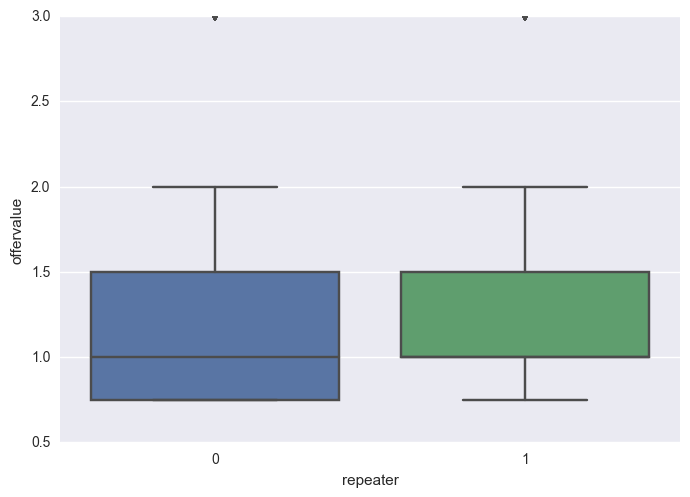

In [55]:
sns.boxplot(x='repeater', y='offervalue', data=train)
sns.plt.show()

In [54]:
train.head()

,id,chain,offer,market,repeattrips,repeater,offerdate,offer_category,quantity,offer_company,offervalue,offer_brand,offer_dept,counts,offer_month,offer_dayofweek
0,86246,205,1208251,34,5,1,2013-04-24,2202,1,104460040,2.00,3718,22,12609.0,4,2
1,86252,205,1197502,34,16,1,2013-03-27,3203,1,106414464,0.75,13474,32,12087.0,3,2
2,12682470,18,1197502,11,0,0,2013-03-28,3203,1,106414464,0.75,13474,32,806.0,3,3
3,12996040,15,1197502,9,0,0,2013-03-25,3203,1,106414464,0.75,13474,32,326.0,3,0
4,13089312,15,1204821,9,0,0,2013-04-01,5619,1,107717272,1.50,102504,56,1218.0,4,0
